Graduation_Project_Source_Code

About Dataset:
Features:

1.   age : Range of patient's age
2.   menopause : Menopause is a natural biological process that marks the end of a woman's menstrual cycles.
3.   tumer-size : Indicates the dimensions of the tumor in the breast. It's usually given in millimeters (mm) and helps assess the tumor's growth and impact.
4.   inv-nodes : INV Nodes are the number (range 0 - 39) of axillary lymph nodes that contain metastatic breast cancer visible on
5.   node-caps : if the cancer does metastasise to a lymph node, although outside the original site of the tumor it may remain
6.   deg-malig : One of the main causes of death is cancer. The most common cancer in women is breast cancer
7.   breast : Position of breast
8.   breast-quad : The breasts are divided into 4 quadrants with the nipple as the center.
9.   irradiate : Irradiation, also known as radiation therapy, is a common treatment for breast cancer.
10.  class : This is the target attribute where classify the situation where there is recurrence or no recurrence of cancer after(Target)




1-Importing (Data Preparation)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('breast-cancer_csv1.csv')

2- Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [ ]:
df.tail()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events
285,50-59,ge40,40-44,0-2,no,3,left,right_up,no,no-recurrence-events


In [ ]:
df.sample(10)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
113,30-39,premeno,40-44,3-5,no,3,right,right_up,yes,no-recurrence-events
200,30-39,premeno,5-9,0-2,no,2,left,right_low,no,no-recurrence-events
211,40-49,premeno,40-44,0-2,no,1,left,left_low,no,recurrence-events
168,40-49,premeno,20-24,0-2,no,2,left,left_up,no,no-recurrence-events
165,50-59,ge40,30-34,6-8,yes,2,left,right_low,yes,recurrence-events
124,30-39,premeno,10-14,0-2,no,2,left,right_low,no,no-recurrence-events
101,50-59,premeno,15-19,0-2,no,2,left,left_low,no,recurrence-events
240,50-59,ge40,30-34,0-2,no,3,left,NaN,no,recurrence-events
280,60-69,ge40,15-19,0-2,no,3,right,left_up,yes,no-recurrence-events
263,40-49,premeno,20-24,3-5,yes,2,right,right_up,yes,recurrence-events


In [ ]:
df.shape

(286, 10)

In [ ]:
df.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [ ]:
df[df['node-caps'].isnull()]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
20,50-59,lt40,20-24,0-2,NaN,1,left,left_low,no,recurrence-events
31,60-69,ge40,25-29,3-5,NaN,1,right,left_low,yes,no-recurrence-events
50,70-79,ge40,15-19,9-11,NaN,1,left,left_low,yes,recurrence-events
54,40-49,premeno,25-29,0-2,NaN,2,left,right_low,yes,no-recurrence-events
71,60-69,ge40,25-29,3-5,NaN,1,right,left_up,yes,no-recurrence-events
92,50-59,lt40,20-24,0-2,NaN,1,left,left_up,no,recurrence-events
149,50-59,ge40,30-34,9-11,NaN,3,left,left_up,yes,no-recurrence-events
264,50-59,ge40,30-34,9-11,NaN,3,left,left_low,yes,no-recurrence-events


In [ ]:
df[df['breast-quad'].isnull()]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
240,50-59,ge40,30-34,0-2,no,3,left,NaN,no,recurrence-events


3-Data Processing

In [ ]:
df.dropna(subset='node-caps', inplace=True)

In [ ]:
df.dropna(subset='breast-quad', inplace=True)
# df=df.dropna()

In [ ]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [ ]:
df.shape

(277, 10)

In [ ]:
#rename
# df.rename(columns={'':''})
for col in df.columns:
  if "deg-malig" in col :
    df[col] = df[col].astype(int)

In [ ]:
unique_degmalig_values = set()

for col in df.columns:
    if "deg-malig" in col:
        unique_degmalig_values.update(df[col].unique())

unique_degmalig_values

{1, 2, 3}

In [ ]:
df["deg-malig"].dtype

dtype('int64')

In [ ]:
df['Class'].value_counts()

Class
no-recurrence-events    196
recurrence-events        81
Name: count, dtype: int64

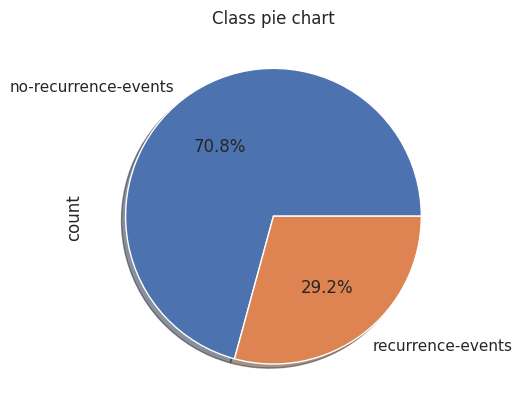

In [ ]:
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Class pie chart')
plt.show()

In [ ]:
df.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')

In [ ]:
df['Class'].replace({"recurrence-events":"1","no-recurrence-events":"0"},inplace=True)
df['Class'] = df['Class'].astype('category')

In [ ]:
df['Class'].value_counts()

Class
0    196
1     81
Name: count, dtype: int64

In [ ]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,1
1,50-59,ge40,15-19,0-2,no,1,right,central,no,0
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,1
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,0
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,1


In [ ]:
df["tumor-size"].value_counts()

tumor-size
30-34    57
25-29    51
20-24    48
15-19    29
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: count, dtype: int64

4-Data Visualization (EDA)

Age - Tumur_Size Relation


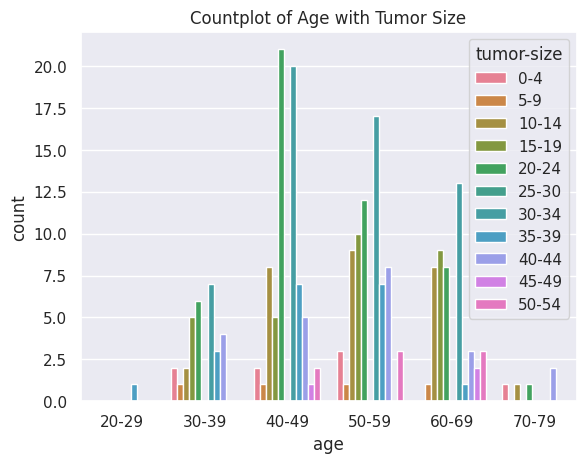

In [ ]:
# merge_data = pd.merge(df, df, on=['breast', 'breast-quad'], suffixes=('_left', '_right'))
# print(merge_data)

# Assuming df is your DataFrame
sns.countplot(data=df, x='age', order=["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"],
              hue='tumor-size',
              hue_order=['0-4', '5-9', '10-14', '15-19', '20-24', '25-30', '30-34', '35-39', '40-44', '45-49', '50-54'])

plt.title('Countplot of Age with Tumor Size')
plt.show()


Class Distribution

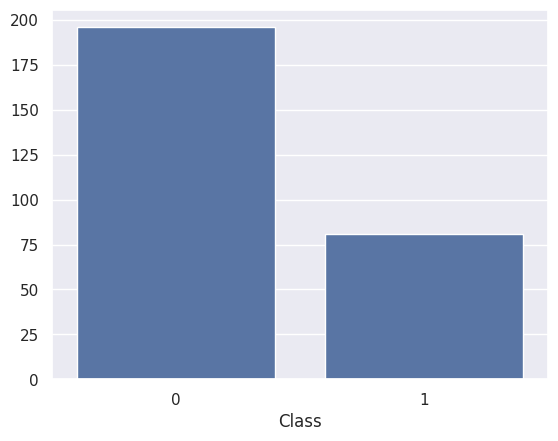

In [ ]:
class_counts = df['Class'].value_counts()

# Create a bar plot
sns.barplot(x=class_counts.index, y=class_counts.values)

# Display the plot
plt.show()


In [ ]:
print(df.columns)


Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')


<Axes: xlabel='menopause', ylabel='count'>

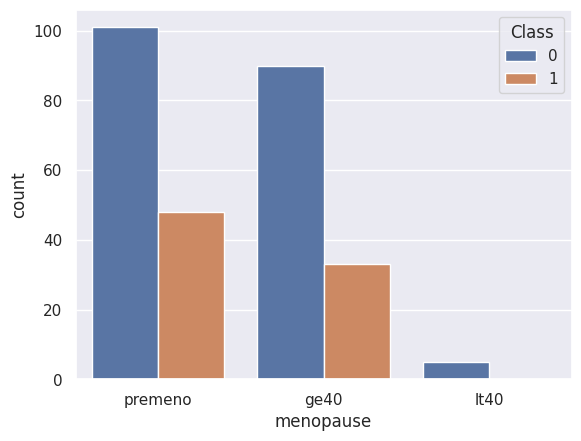

In [ ]:
sns.countplot(data=df, x='menopause', hue='Class')


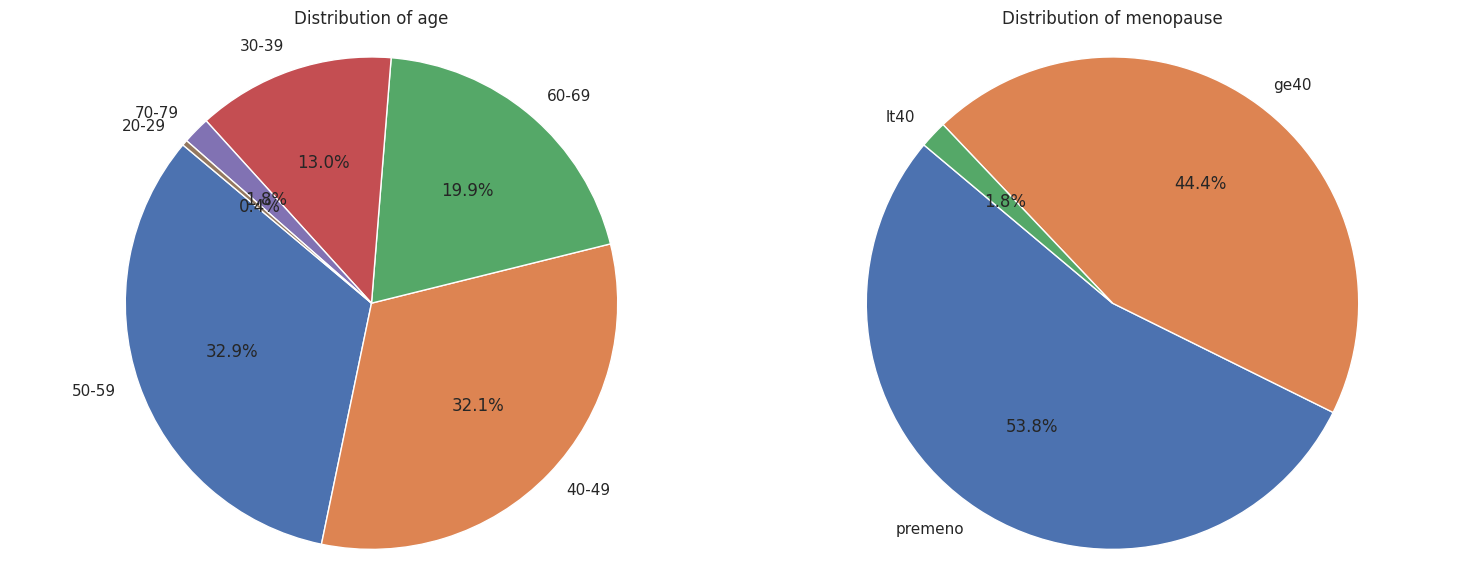

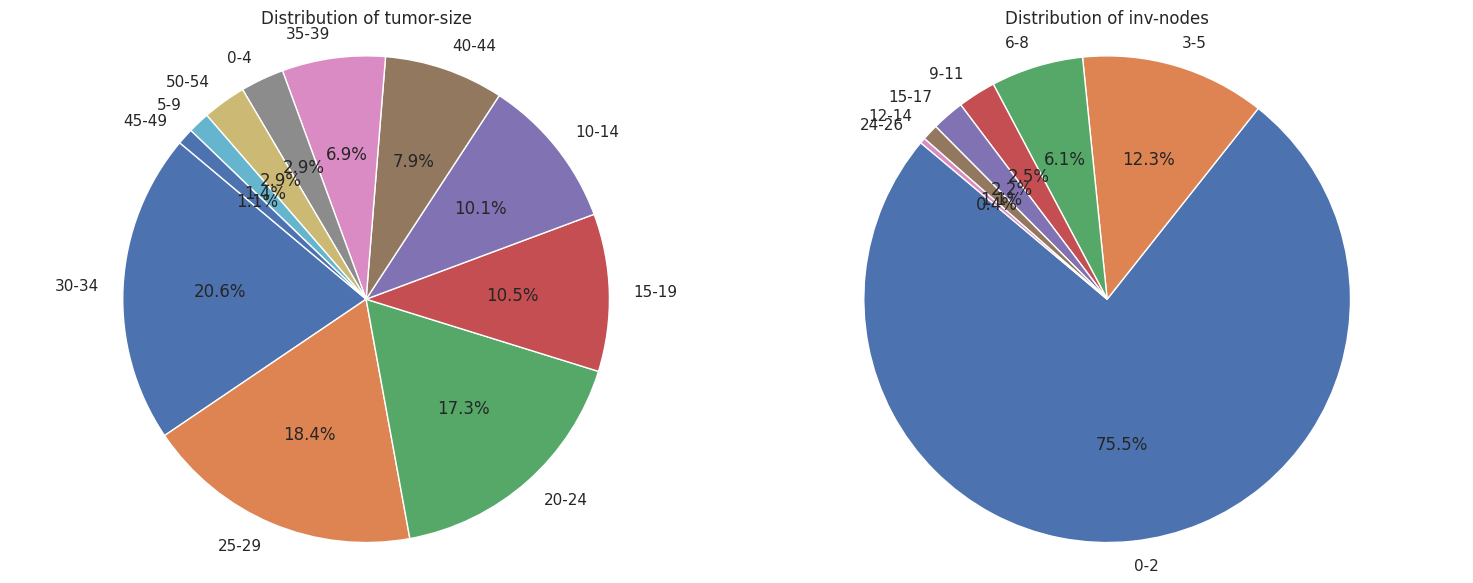

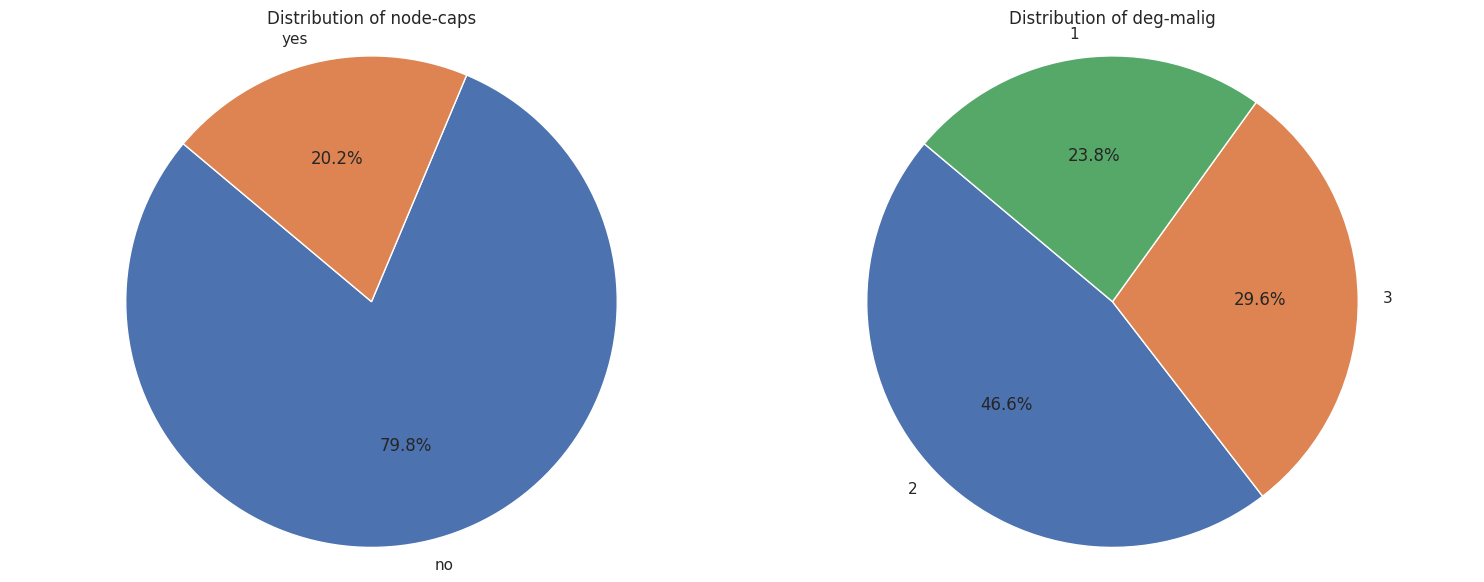

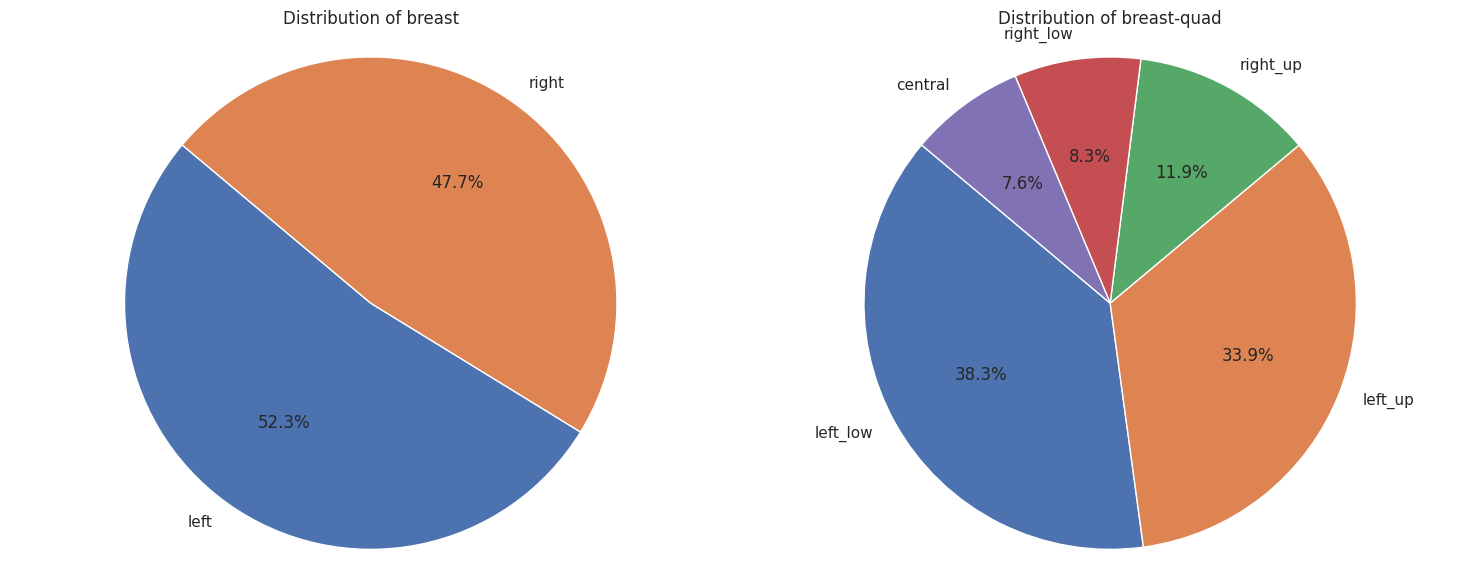

In [ ]:

columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad']

column_groups = [columns[i:i+2] for i in range(0, len(columns), 2)]

for group in column_groups:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    for i, col in enumerate(group):
        ax = axes[i]
        value_counts = df[col].value_counts()
        labels = value_counts.index
        sizes = value_counts.values
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        ax.axis('equal')
        ax.set_title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()


<ipython-input-31-c973643f656a>:17: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x="tumor-size", hue="Class", data=df, ax=axes[0, 0], palette=tumor_size_palette)
<ipython-input-31-c973643f656a>:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x="inv-nodes", hue="Class", data=df, ax=axes[0, 1], palette=inv_nodes_palette)
<ipython-input-31-c973643f656a>:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x="node-caps", hue="Class", data=df, ax=axes[1, 0], palette=node_caps_palette)
<ipython-input-31-c973643f656a>:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x="breast-quad", hue="Class", data=df, ax=axes[1, 1], palette=breast_quad_palette)


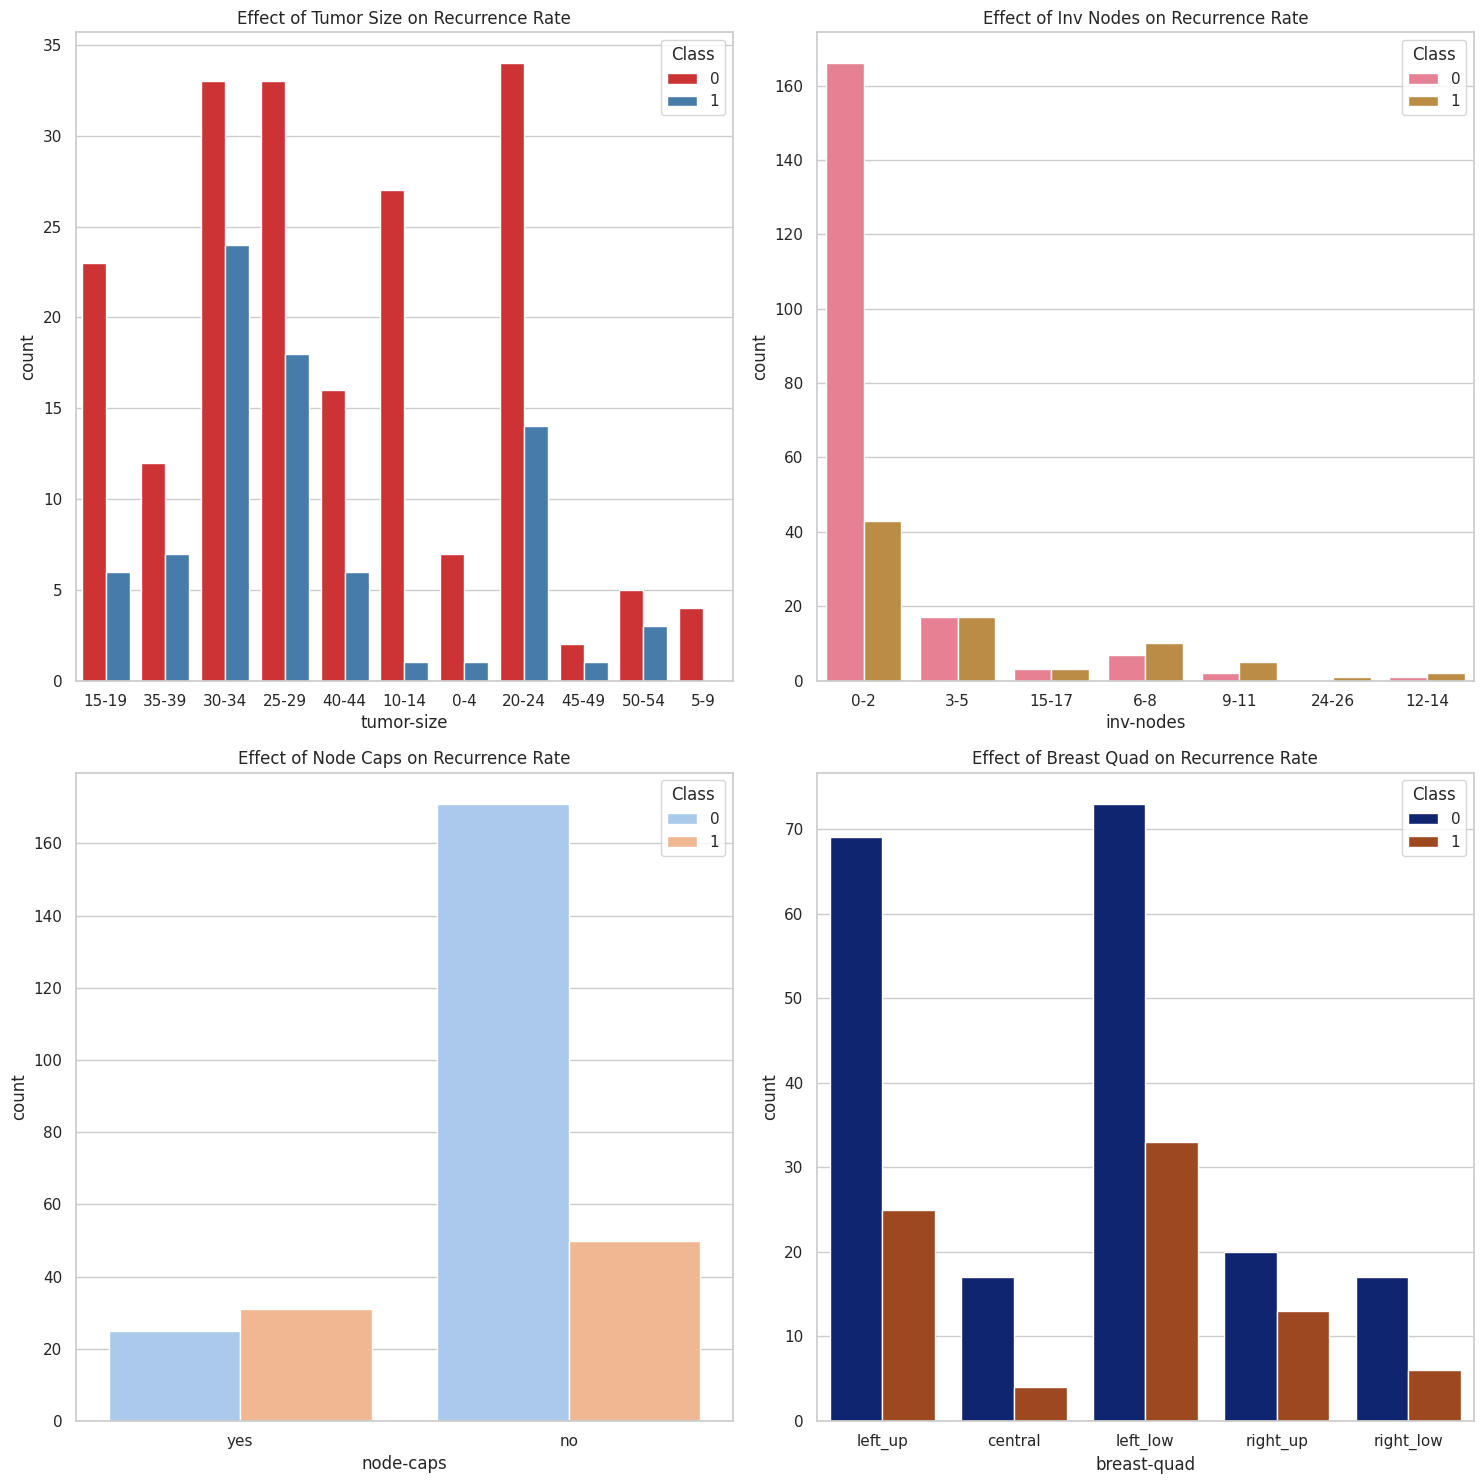

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.set(style="whitegrid")
# Define custom color palettes for each plot
tumor_size_palette = sns.color_palette("Set1", 8)
inv_nodes_palette = sns.color_palette("husl", 8)
node_caps_palette = sns.color_palette("pastel", 8)
breast_quad_palette = sns.color_palette("dark", 8)

# Create subplots for each factor
f, axes = plt.subplots(2, 2, figsize=(15, 15))

# Graph 1 - Tumor Size
sns.countplot(x="tumor-size", hue="Class", data=df, ax=axes[0, 0], palette=tumor_size_palette)
axes[0, 0].set_title("Effect of Tumor Size on Recurrence Rate")

# Graph 2 - Inv Nodes
sns.countplot(x="inv-nodes", hue="Class", data=df, ax=axes[0, 1], palette=inv_nodes_palette)
axes[0, 1].set_title("Effect of Inv Nodes on Recurrence Rate")

# Graph 3 - Node Caps
sns.countplot(x="node-caps", hue="Class", data=df, ax=axes[1, 0], palette=node_caps_palette)
axes[1, 0].set_title("Effect of Node Caps on Recurrence Rate")

# Graph 4 - Breast Quad
sns.countplot(x="breast-quad", hue="Class", data=df, ax=axes[1, 1], palette=breast_quad_palette)
axes[1, 1].set_title("Effect of Breast Quad on Recurrence Rate")

# Adjust layout
plt.tight_layout()
plt.show()


5- Feature Engineering

In [ ]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        # Handle missing values
        df[column].fillna("unknown", inplace=True)

        # Fit and transform on the training data
        df[column] = label_encoder.fit_transform(df[column])

# Now you can use the encoded DataFrame for further analysis or modeling

Splitting Data ,train and test

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6- Modeling

1st Model: Decision Tree

In [ ]:
# Decision Trees Model
dt_model = DecisionTreeClassifier(random_state=30)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy *100)

Decision Tree Accuracy: 78.57142857142857


2nd Model: Random Forest

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=15)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy *100)

Random Forest Accuracy: 83.92857142857143


3rd Model: Logistic Regression

In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression(random_state=50)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy *100)

Logistic Regression Accuracy: 69.64285714285714


4th Model: K-Nearest Neighbors (KNN)

In [ ]:
# K-Nearest Neighbors Model(KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy *100)

KNN Accuracy: 71.69811320754717


5th Model : Support Vector Machines (SVM)

In [ ]:
# Support Vector Machines (SVM)
svm_model = SVC(random_state=30)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy *100)

SVM Accuracy: 80.35714285714286


In [ ]:
# Neural network model
nn_model = MLPClassifier(activation='tanh',solver='adam',learning_rate='constant',hidden_layer_sizes=(100,20),random_state=20)
nn_model.fit(X_train_scaled, y_train)
nn_pred= nn_model.predict(X_test_scaled)
nn_accuracy = accuracy_score(y_test, nn_pred)
print("Neural Network Accuracy:", nn_accuracy *100)

Neural Network Accuracy: 83.92857142857143


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=30)),
    ("Random Forest", RandomForestClassifier(random_state=15)),
    ("Logistic Regression", LogisticRegression(random_state=50)),
     ("KNN", KNeighborsClassifier()),
      ("SVM", SVC(random_state=30)),
    ("Neural Network" , MLPClassifier(random_state=20)),
]

In [ ]:
results = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

    results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Comparison Between Models with their different accuracies

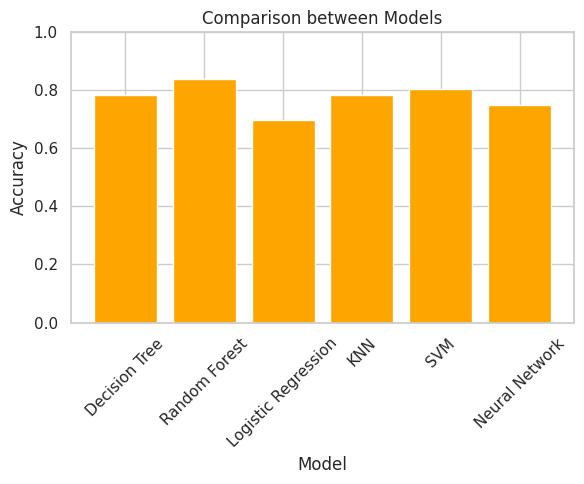

In [ ]:
plt.figure(figsize=(6, 5))
plt.bar(results_df['Model'], results_df['Accuracy'], color='orange')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison between Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Finally: Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


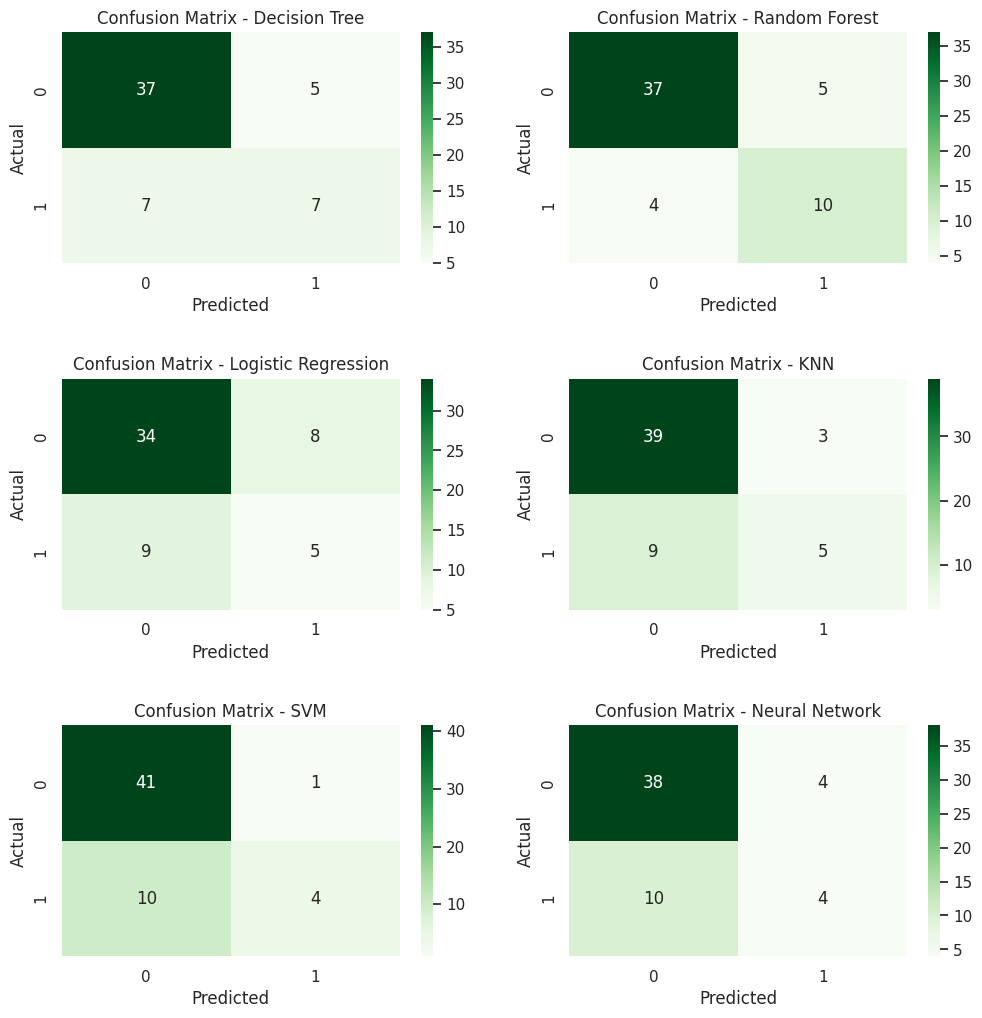

In [ ]:
num_models = len(models)
num_columns = 2
num_rows = (num_models + 1) // num_columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(12, 4 * num_rows))

for i, (name, model) in enumerate(models):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)

    row = i // num_columns
    col = i % num_columns
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[row, col])
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')
    axes[row, col].set_title(f'Confusion Matrix - {name}')

    plt.subplots_adjust(hspace=0.5)

for i in range(len(models), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])
    plt.tight_layout()
    plt.show()